# Hong Kong Pollution: Data Wrangling

**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation





# Data Collection
Load required packages and modules into Python. Then load the data into a pandas dataframe for ease of use.

In [1]:
# load python packages from environment
import os
import urllib.request
import seaborn as sns
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

<b>Prepare to save the urls to csv. Save current working directory.</b>

In [2]:
path = os.getcwd()
print(path)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/notebooks


<b>Get parent directory and append path to raw data.</b>

In [3]:
# Create raw data path by getting parent directory of current working directory and appending data/raw
parent_path = os.path.dirname(path)
rawdata_path = os.path.join(parent_path, 'data', 'raw')
print(parent_path)
print(rawdata_path)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution
/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/data/raw


## Save the data to csv files (Jan 2014 - Oct 2020)
<b>Save data into data/raw/ folder from Hong Kong Environmental Protection Department website.
<br>https://www.epd.gov.hk/epd/epic/english/data_air_data.html</b>

In [4]:
'''
Comment out after final run through of data collection to
ensure data remains in tact.

# Save Air Quality Data URLs

# 2014
url_aqhi_201401 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201401_Eng.csv"
url_aqhi_201402 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201402_Eng.csv"
url_aqhi_201403 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201403_Eng.csv"
url_aqhi_201404 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201404_Eng.csv"
url_aqhi_201405 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201405_Eng.csv"
url_aqhi_201406 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201406_Eng.csv"
url_aqhi_201407 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201407_Eng.csv"
url_aqhi_201408 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201408_Eng.csv"
url_aqhi_201409 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201409_Eng.csv"
url_aqhi_201410 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201410_Eng.csv"
url_aqhi_201411 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201411_Eng.csv"
url_aqhi_201412 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201412_Eng.csv"

# 2015
url_aqhi_201501 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201501_Eng.csv"
url_aqhi_201502 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201502_Eng.csv"
url_aqhi_201503 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201503_Eng.csv"
url_aqhi_201504 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201504_Eng.csv"
url_aqhi_201505 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201505_Eng.csv"
url_aqhi_201506 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201506_Eng.csv"
url_aqhi_201507 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201507_Eng.csv"
url_aqhi_201508 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201508_Eng.csv"
url_aqhi_201509 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201509_Eng.csv"
url_aqhi_201510 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201510_Eng.csv"
url_aqhi_201511 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201511_Eng.csv"
url_aqhi_201512 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201512_Eng.csv"

# 2016
url_aqhi_201601 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201601_Eng.csv"
url_aqhi_201602 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201602_Eng.csv"
url_aqhi_201603 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201603_Eng.csv"
url_aqhi_201604 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201604_Eng.csv"
url_aqhi_201605 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201605_Eng.csv"
url_aqhi_201606 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201606_Eng.csv"
url_aqhi_201607 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201607_Eng.csv"
url_aqhi_201608 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201608_Eng.csv"
url_aqhi_201609 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201609_Eng.csv"
url_aqhi_201610 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201610_Eng.csv"
url_aqhi_201611 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201611_Eng.csv"
url_aqhi_201612 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201612_Eng.csv"

# 2017
url_aqhi_201701 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201701_Eng.csv"
url_aqhi_201702 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201702_Eng.csv"
url_aqhi_201703 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201703_Eng.csv"
url_aqhi_201704 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201704_Eng.csv"
url_aqhi_201705 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201705_Eng.csv"
url_aqhi_201706 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201706_Eng.csv"
url_aqhi_201707 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201707_Eng.csv"
url_aqhi_201708 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201708_Eng.csv"
url_aqhi_201709 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201709_Eng.csv"
url_aqhi_201710 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201710_Eng.csv"
url_aqhi_201711 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201711_Eng.csv"
url_aqhi_201712 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201712_Eng.csv"

# 2018
url_aqhi_201801 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201801_Eng.csv"
url_aqhi_201802 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201802_Eng.csv"
url_aqhi_201803 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201803_Eng.csv"
url_aqhi_201804 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201804_Eng.csv"
url_aqhi_201805 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201805_Eng.csv"
url_aqhi_201806 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201806_Eng.csv"
url_aqhi_201807 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201807_Eng.csv"
url_aqhi_201808 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201808_Eng.csv"
url_aqhi_201809 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201809_Eng.csv"
url_aqhi_201810 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201810_Eng.csv"
url_aqhi_201811 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201811_Eng.csv"
url_aqhi_201812 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201812_Eng.csv"

# 2019
url_aqhi_201901 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201901_Eng.csv"
url_aqhi_201902 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201902_Eng.csv"
url_aqhi_201903 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201903_Eng.csv"
url_aqhi_201904 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201904_Eng.csv"
url_aqhi_201905 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201905_Eng.csv"
url_aqhi_201906 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201906_Eng.csv"
url_aqhi_201907 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201907_Eng.csv"
url_aqhi_201908 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201908_Eng.csv"
url_aqhi_201909 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201909_Eng.csv"
url_aqhi_201910 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201910_Eng.csv"
url_aqhi_201911 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201911_Eng.csv"
url_aqhi_201912 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201912_Eng.csv"

# 2020
url_aqhi_202001 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202001_Eng.csv"
url_aqhi_202002 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202002_Eng.csv"
url_aqhi_202003 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202003_Eng.csv"
url_aqhi_202004 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202004_Eng.csv"
url_aqhi_202005 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202005_Eng.csv"
url_aqhi_202006 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202006_Eng.csv"
url_aqhi_202007 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202007_Eng.csv"
url_aqhi_202008 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202008_Eng.csv"
url_aqhi_202009 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202009_Eng.csv"
url_aqhi_202010 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202010_Eng.csv"

'''

'\nComment out after final run through of data collection to\nensure data remains in tact.\n\n# Save Air Quality Data URLs\n\n# 2014\nurl_aqhi_201401 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201401_Eng.csv"\nurl_aqhi_201402 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201402_Eng.csv"\nurl_aqhi_201403 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201403_Eng.csv"\nurl_aqhi_201404 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201404_Eng.csv"\nurl_aqhi_201405 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201405_Eng.csv"\nurl_aqhi_201406 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201406_Eng.csv"\nurl_aqhi_201407 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201407_Eng.csv"\nurl_aqhi_201408 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201408_Eng.csv"\nurl_aqhi_201409 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201409_Eng.csv"\nurl_aqhi_201410 = "https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201

In [5]:
'''
Comment out after final run through of data collection to
ensure data remains in tact.

# Save AQI csvs into data/raw folder using rawdata_path variable

# 2014
urllib.request.urlretrieve (url_aqhi_201401, os.path.join(rawdata_path, 'aqhi_201401.csv'))
urllib.request.urlretrieve (url_aqhi_201402, os.path.join(rawdata_path, 'aqhi_201402.csv'))
urllib.request.urlretrieve (url_aqhi_201403, os.path.join(rawdata_path, 'aqhi_201403.csv'))
urllib.request.urlretrieve (url_aqhi_201404, os.path.join(rawdata_path, 'aqhi_201404.csv'))
urllib.request.urlretrieve (url_aqhi_201405, os.path.join(rawdata_path, 'aqhi_201405.csv'))
urllib.request.urlretrieve (url_aqhi_201406, os.path.join(rawdata_path, 'aqhi_201406.csv'))
urllib.request.urlretrieve (url_aqhi_201407, os.path.join(rawdata_path, 'aqhi_201407.csv'))
urllib.request.urlretrieve (url_aqhi_201408, os.path.join(rawdata_path, 'aqhi_201408.csv'))
urllib.request.urlretrieve (url_aqhi_201409, os.path.join(rawdata_path, 'aqhi_201409.csv'))
urllib.request.urlretrieve (url_aqhi_201410, os.path.join(rawdata_path, 'aqhi_201410.csv'))
urllib.request.urlretrieve (url_aqhi_201411, os.path.join(rawdata_path, 'aqhi_201411.csv'))
urllib.request.urlretrieve (url_aqhi_201412, os.path.join(rawdata_path, 'aqhi_201412.csv'))

# 2015
urllib.request.urlretrieve (url_aqhi_201501, os.path.join(rawdata_path, 'aqhi_201501.csv'))
urllib.request.urlretrieve (url_aqhi_201502, os.path.join(rawdata_path, 'aqhi_201502.csv'))
urllib.request.urlretrieve (url_aqhi_201503, os.path.join(rawdata_path, 'aqhi_201503.csv'))
urllib.request.urlretrieve (url_aqhi_201504, os.path.join(rawdata_path, 'aqhi_201504.csv'))
urllib.request.urlretrieve (url_aqhi_201505, os.path.join(rawdata_path, 'aqhi_201505.csv'))
urllib.request.urlretrieve (url_aqhi_201506, os.path.join(rawdata_path, 'aqhi_201506.csv'))
urllib.request.urlretrieve (url_aqhi_201507, os.path.join(rawdata_path, 'aqhi_201507.csv'))
urllib.request.urlretrieve (url_aqhi_201508, os.path.join(rawdata_path, 'aqhi_201508.csv'))
urllib.request.urlretrieve (url_aqhi_201509, os.path.join(rawdata_path, 'aqhi_201509.csv'))
urllib.request.urlretrieve (url_aqhi_201510, os.path.join(rawdata_path, 'aqhi_201510.csv'))
urllib.request.urlretrieve (url_aqhi_201511, os.path.join(rawdata_path, 'aqhi_201511.csv'))
urllib.request.urlretrieve (url_aqhi_201512, os.path.join(rawdata_path, 'aqhi_201512.csv'))

# 2016
urllib.request.urlretrieve (url_aqhi_201601, os.path.join(rawdata_path, 'aqhi_201601.csv'))
urllib.request.urlretrieve (url_aqhi_201602, os.path.join(rawdata_path, 'aqhi_201602.csv'))
urllib.request.urlretrieve (url_aqhi_201603, os.path.join(rawdata_path, 'aqhi_201603.csv'))
urllib.request.urlretrieve (url_aqhi_201604, os.path.join(rawdata_path, 'aqhi_201604.csv'))
urllib.request.urlretrieve (url_aqhi_201605, os.path.join(rawdata_path, 'aqhi_201605.csv'))
urllib.request.urlretrieve (url_aqhi_201606, os.path.join(rawdata_path, 'aqhi_201606.csv'))
urllib.request.urlretrieve (url_aqhi_201607, os.path.join(rawdata_path, 'aqhi_201607.csv'))
urllib.request.urlretrieve (url_aqhi_201608, os.path.join(rawdata_path, 'aqhi_201608.csv'))
urllib.request.urlretrieve (url_aqhi_201609, os.path.join(rawdata_path, 'aqhi_201609.csv'))
urllib.request.urlretrieve (url_aqhi_201610, os.path.join(rawdata_path, 'aqhi_201610.csv'))
urllib.request.urlretrieve (url_aqhi_201611, os.path.join(rawdata_path, 'aqhi_201611.csv'))
urllib.request.urlretrieve (url_aqhi_201612, os.path.join(rawdata_path, 'aqhi_201612.csv'))

# 2017
urllib.request.urlretrieve (url_aqhi_201701, os.path.join(rawdata_path, 'aqhi_201701.csv'))
urllib.request.urlretrieve (url_aqhi_201702, os.path.join(rawdata_path, 'aqhi_201702.csv'))
urllib.request.urlretrieve (url_aqhi_201703, os.path.join(rawdata_path, 'aqhi_201703.csv'))
urllib.request.urlretrieve (url_aqhi_201704, os.path.join(rawdata_path, 'aqhi_201704.csv'))
urllib.request.urlretrieve (url_aqhi_201705, os.path.join(rawdata_path, 'aqhi_201705.csv'))
urllib.request.urlretrieve (url_aqhi_201706, os.path.join(rawdata_path, 'aqhi_201706.csv'))
urllib.request.urlretrieve (url_aqhi_201707, os.path.join(rawdata_path, 'aqhi_201707.csv'))
urllib.request.urlretrieve (url_aqhi_201708, os.path.join(rawdata_path, 'aqhi_201708.csv'))
urllib.request.urlretrieve (url_aqhi_201709, os.path.join(rawdata_path, 'aqhi_201709.csv'))
urllib.request.urlretrieve (url_aqhi_201710, os.path.join(rawdata_path, 'aqhi_201710.csv'))
urllib.request.urlretrieve (url_aqhi_201711, os.path.join(rawdata_path, 'aqhi_201711.csv'))
urllib.request.urlretrieve (url_aqhi_201712, os.path.join(rawdata_path, 'aqhi_201712.csv'))

# 2018
urllib.request.urlretrieve (url_aqhi_201801, os.path.join(rawdata_path, 'aqhi_201801.csv'))
urllib.request.urlretrieve (url_aqhi_201802, os.path.join(rawdata_path, 'aqhi_201802.csv'))
urllib.request.urlretrieve (url_aqhi_201803, os.path.join(rawdata_path, 'aqhi_201803.csv'))
urllib.request.urlretrieve (url_aqhi_201804, os.path.join(rawdata_path, 'aqhi_201804.csv'))
urllib.request.urlretrieve (url_aqhi_201805, os.path.join(rawdata_path, 'aqhi_201805.csv'))
urllib.request.urlretrieve (url_aqhi_201806, os.path.join(rawdata_path, 'aqhi_201806.csv'))
urllib.request.urlretrieve (url_aqhi_201807, os.path.join(rawdata_path, 'aqhi_201807.csv'))
urllib.request.urlretrieve (url_aqhi_201808, os.path.join(rawdata_path, 'aqhi_201808.csv'))
urllib.request.urlretrieve (url_aqhi_201809, os.path.join(rawdata_path, 'aqhi_201809.csv'))
urllib.request.urlretrieve (url_aqhi_201810, os.path.join(rawdata_path, 'aqhi_201810.csv'))
urllib.request.urlretrieve (url_aqhi_201811, os.path.join(rawdata_path, 'aqhi_201811.csv'))
urllib.request.urlretrieve (url_aqhi_201812, os.path.join(rawdata_path, 'aqhi_201812.csv'))

# 2019
urllib.request.urlretrieve (url_aqhi_201901, os.path.join(rawdata_path, 'aqhi_201901.csv'))
urllib.request.urlretrieve (url_aqhi_201902, os.path.join(rawdata_path, 'aqhi_201902.csv'))
urllib.request.urlretrieve (url_aqhi_201903, os.path.join(rawdata_path, 'aqhi_201903.csv'))
urllib.request.urlretrieve (url_aqhi_201904, os.path.join(rawdata_path, 'aqhi_201904.csv'))
urllib.request.urlretrieve (url_aqhi_201905, os.path.join(rawdata_path, 'aqhi_201905.csv'))
urllib.request.urlretrieve (url_aqhi_201906, os.path.join(rawdata_path, 'aqhi_201906.csv'))
urllib.request.urlretrieve (url_aqhi_201907, os.path.join(rawdata_path, 'aqhi_201907.csv'))
urllib.request.urlretrieve (url_aqhi_201908, os.path.join(rawdata_path, 'aqhi_201908.csv'))
urllib.request.urlretrieve (url_aqhi_201909, os.path.join(rawdata_path, 'aqhi_201909.csv'))
urllib.request.urlretrieve (url_aqhi_201910, os.path.join(rawdata_path, 'aqhi_201910.csv'))
urllib.request.urlretrieve (url_aqhi_201911, os.path.join(rawdata_path, 'aqhi_201911.csv'))
urllib.request.urlretrieve (url_aqhi_201912, os.path.join(rawdata_path, 'aqhi_201912.csv'))

# 2020
urllib.request.urlretrieve (url_aqhi_202001, os.path.join(rawdata_path, 'aqhi_202001.csv'))
urllib.request.urlretrieve (url_aqhi_202002, os.path.join(rawdata_path, 'aqhi_202002.csv'))
urllib.request.urlretrieve (url_aqhi_202003, os.path.join(rawdata_path, 'aqhi_202003.csv'))
urllib.request.urlretrieve (url_aqhi_202004, os.path.join(rawdata_path, 'aqhi_202004.csv'))
urllib.request.urlretrieve (url_aqhi_202005, os.path.join(rawdata_path, 'aqhi_202005.csv'))
urllib.request.urlretrieve (url_aqhi_202006, os.path.join(rawdata_path, 'aqhi_202006.csv'))
urllib.request.urlretrieve (url_aqhi_202007, os.path.join(rawdata_path, 'aqhi_202007.csv'))
urllib.request.urlretrieve (url_aqhi_202008, os.path.join(rawdata_path, 'aqhi_202008.csv'))
urllib.request.urlretrieve (url_aqhi_202009, os.path.join(rawdata_path, 'aqhi_202009.csv'))
urllib.request.urlretrieve (url_aqhi_202010, os.path.join(rawdata_path, 'aqhi_202010.csv'))

'''

"\nComment out after final run through of data collection to\nensure data remains in tact.\n\n# Save AQI csvs into data/raw folder using rawdata_path variable\n\n# 2014\nurllib.request.urlretrieve (url_aqhi_201401, os.path.join(rawdata_path, 'aqhi_201401.csv'))\nurllib.request.urlretrieve (url_aqhi_201402, os.path.join(rawdata_path, 'aqhi_201402.csv'))\nurllib.request.urlretrieve (url_aqhi_201403, os.path.join(rawdata_path, 'aqhi_201403.csv'))\nurllib.request.urlretrieve (url_aqhi_201404, os.path.join(rawdata_path, 'aqhi_201404.csv'))\nurllib.request.urlretrieve (url_aqhi_201405, os.path.join(rawdata_path, 'aqhi_201405.csv'))\nurllib.request.urlretrieve (url_aqhi_201406, os.path.join(rawdata_path, 'aqhi_201406.csv'))\nurllib.request.urlretrieve (url_aqhi_201407, os.path.join(rawdata_path, 'aqhi_201407.csv'))\nurllib.request.urlretrieve (url_aqhi_201408, os.path.join(rawdata_path, 'aqhi_201408.csv'))\nurllib.request.urlretrieve (url_aqhi_201409, os.path.join(rawdata_path, 'aqhi_201409.c

## Load data from csv files
Prior to reading into a df, examine each csv file and record number of lines to skip and what the header is.

### 2014 Annual Dataframe

In [6]:
# Create list of 2014 monthly filenames
filenames_2014 = ['aqhi_201401.csv',
                  'aqhi_201402.csv',
                  'aqhi_201403.csv',
                  'aqhi_201404.csv',
                  'aqhi_201405.csv',
                  'aqhi_201406.csv',
                  'aqhi_201407.csv',
                  'aqhi_201408.csv',
                  'aqhi_201409.csv',
                  'aqhi_201410.csv',
                  'aqhi_201411.csv',
                  'aqhi_201412.csv']

# Loop over filenames to create a list of 2014 monthly dataframes
df_2014_list = []
for filename in filenames_2014:
    df_2014_list.append(pd.read_csv(os.path.join(rawdata_path, filename), header=6, sep=',', na_values=""))

# Concatenate list of 2014 monthly dataframes into an Annual 2014 Dataframe
df_2014 = pd.concat(df_2014_list, ignore_index=True)

### 2015 Annual Dataframe

In [7]:
# Create list of 2015 monthly filenames
filenames_2015 = ['aqhi_201501.csv',
                  'aqhi_201502.csv',
                  'aqhi_201503.csv',
                  'aqhi_201504.csv',
                  'aqhi_201505.csv',
                  'aqhi_201506.csv',
                  'aqhi_201507.csv',
                  'aqhi_201508.csv',
                  'aqhi_201509.csv',
                  'aqhi_201510.csv',
                  'aqhi_201511.csv',
                  'aqhi_201512.csv']

# Loop over filenames to create a list of 2015 monthly dataframes
df_2015_list = []
for filename in filenames_2015:
    df_2015_list.append(pd.read_csv(os.path.join(rawdata_path, filename), header=6, sep=',', na_values=""))

# Concatenate list of 2015 monthly dataframes into an Annual 2015 Dataframe
df_2015 = pd.concat(df_2015_list, ignore_index=True)
df_2015.head(3)

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,2015-01-01,01,4,5,6,5,5,4,4,7,4,4,5,4,7,7,6
1,NaN,02,4,5,6,5,5,4,4,6,4,4,4,4,7,7,6
2,NaN,03,4,5,6,5,5,4,4,5,4,4,4,4,6,7,5


### 2016 Annual Dataframe

In [8]:
# Jan 2016 does not contain Tseung Kwan O

# Create list of 2016 monthly filenames
filenames_2016 = ['aqhi_201601.csv',
                  'aqhi_201602.csv',
                  'aqhi_201603.csv',
                  'aqhi_201604.csv',
                  'aqhi_201605.csv',
                  'aqhi_201606.csv',
                  'aqhi_201607.csv',
                  'aqhi_201608.csv',
                  'aqhi_201609.csv',
                  'aqhi_201610.csv',
                  'aqhi_201611.csv',
                  'aqhi_201612.csv']

# Loop over filenames to create a list of 2016 monthly dataframes
df_2016_list = []
for filename in filenames_2016:
    df_2016_list.append(pd.read_csv(os.path.join(rawdata_path, filename), header=6, sep=',', na_values=""))

# Concatenate list of 2016 monthly dataframes into an Annual 2016 Dataframe
df_2016 = pd.concat(df_2016_list, ignore_index=True)
df_2016.head(3)

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok,Tseung Kwan O
0,2016-01-01,01,5,5,5,5,5,5,4,4,3,3,5,*,5,5,5,NaN
1,NaN,02,5,5,5,5,5,5,4,4,4,4,5,*,5,5,5,NaN
2,NaN,03,5,5,5,5,5,5,3,4,4,5,5,*,5,5,5,NaN


### 2017 Annual Dataframe

In [9]:
# Create list of 2017 monthly filenames
filenames_2017 = ['aqhi_201701.csv',
                  'aqhi_201702.csv',
                  'aqhi_201703.csv',
                  'aqhi_201704.csv',
                  'aqhi_201705.csv',
                  'aqhi_201706.csv',
                  'aqhi_201707.csv',
                  'aqhi_201708.csv',
                  'aqhi_201709.csv',
                  'aqhi_201710.csv',
                  'aqhi_201711.csv',
                  'aqhi_201712.csv']

# Loop over filenames to create a list of 2017 monthly dataframes
df_2017_list = []
for filename in filenames_2017:
    df_2017_list.append(pd.read_csv(os.path.join(rawdata_path, filename), header=6, sep=',', na_values=""))

# Concatenate list of 2017 monthly dataframes into an Annual 2017 Dataframe
df_2017 = pd.concat(df_2017_list, ignore_index=True)

### 2018 Annual Dataframe

In [10]:
# Create list of 2018 monthly filenames
filenames_2018 = ['aqhi_201801.csv',
                  'aqhi_201802.csv',
                  'aqhi_201803.csv',
                  'aqhi_201804.csv',
                  'aqhi_201805.csv',
                  'aqhi_201806.csv',
                  'aqhi_201807.csv',
                  'aqhi_201808.csv',
                  'aqhi_201809.csv',
                  'aqhi_201810.csv',
                  'aqhi_201811.csv',
                  'aqhi_201812.csv']

# Loop over filenames to create a list of 2018 monthly dataframes
df_2018_list = []
for filename in filenames_2018:
    df_2018_list.append(pd.read_csv(os.path.join(rawdata_path, filename), header=6, sep=',', na_values=""))

# Concatenate list of 2018 monthly dataframes into an Annual 2018 Dataframe
df_2018 = pd.concat(df_2018_list, ignore_index=True)

### 2019 Annual Dataframe

In [11]:
# Create list of 2019 monthly filenames
filenames_2019 = ['aqhi_201901.csv',
                  'aqhi_201902.csv',
                  'aqhi_201903.csv',
                  'aqhi_201904.csv',
                  'aqhi_201905.csv',
                  'aqhi_201906.csv',
                  'aqhi_201907.csv',
                  'aqhi_201908.csv',
                  'aqhi_201909.csv',
                  'aqhi_201910.csv',
                  'aqhi_201911.csv',
                  'aqhi_201912.csv']

# Loop over filenames to create a list of 2019 monthly dataframes
df_2019_list = []
for filename in filenames_2019:
    df_2019_list.append(pd.read_csv(os.path.join(rawdata_path, filename), header=6, sep=',', na_values=""))

# Concatenate list of 2019 monthly dataframes into an Annual 2019 Dataframe
df_2019 = pd.concat(df_2019_list, ignore_index=True)

### 2020 Annual Dataframe

In [12]:
# Create list of 2020 monthly filenames
filenames_2020 = ['aqhi_202001.csv',
                  'aqhi_202002.csv',
                  'aqhi_202003.csv',
                  'aqhi_202004.csv',
                  'aqhi_202005.csv',
                  'aqhi_202006.csv',
                  'aqhi_202007.csv',
                  'aqhi_202008.csv',
                  'aqhi_202009.csv',
                  'aqhi_202010.csv']

# Loop over filenames to create a list of 2020 monthly dataframes
df_2020_list = []
for filename in filenames_2020:
    df_2020_list.append(pd.read_csv(os.path.join(rawdata_path, filename), header=6, sep=',', na_values=""))

# Concatenate list of 2020 monthly dataframes into an Annual 2020 Dataframe
df_2020 = pd.concat(df_2020_list, ignore_index=True)

# Drop last two columns ('Southern', 'North') due to not having any information
df_2020.drop(['Southern', 'North'], axis=1, inplace=True)

## Fill in date & remove additional characters (asterisk *)

In [13]:
# Create list of each years' dataframe
annual_list = [df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]

# Loop over list of years and apply cleaning
for year in annual_list:
    # Convert Date object to datetime object
    year['Date'] = pd.to_datetime(year['Date'])
    year.iloc[:,0].ffill(axis=0, inplace=True)
    
    # Remove asterisk (*) holding place of Null values
    # Remove asterisk (*) attached to numbers
    # Replace 10+ with 11 to signify AQHI above the 1-10 range
    year.replace(to_replace=[r'^(10)\+\*', r'^(10)\+$', r'^\*$', r'\*$'], value=['11', '11', np.nan, ''], regex=True, inplace=True)
    
    # Convert AQHI values to_numeric
    for col in year.columns[2:]:
        year[col] = pd.to_numeric(year[col], errors='coerce')

## Compile dataframe of all years

In [14]:
df_complete = pd.concat(annual_list, ignore_index=True)
df_complete.head(3)

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok,Tseung Kwan O
0,2014-01-01,01,6.0,7.0,9.0,8.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,4.0,10.0,7.0,9.0,NaN
1,2014-01-01,02,6.0,7.0,9.0,7.0,6.0,5.0,6.0,8.0,5.0,5.0,6.0,4.0,10.0,7.0,9.0,NaN
2,2014-01-01,03,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,5.0,5.0,6.0,5.0,9.0,6.0,8.0,NaN


# Data Organization
Completed using cookiecutter.<br>
See README for structure.

# Data Definition
Review column names, data types, and null values.

## Column Names

In [15]:
df_complete.columns

Index(['Date', 'Hour', 'Central/Western', 'Eastern', 'Kwun Tong',
       'Sham Shui Po', 'Kwai Chung', 'Tsuen Wan', 'Yuen Long', 'Tuen Mun',
       'Tung Chung', 'Tai Po', 'Sha Tin', 'Tap Mun', 'Causeway Bay', 'Central',
       'Mong Kok', 'Tseung Kwan O'],
      dtype='object')

## Data Types
Review which columns are integer, float, categorical, or dates. Ensure the data type is loaded properly into dataframe.

In [16]:
df_complete.dtypes

Date               datetime64[ns]
Hour                       object
Central/Western           float64
Eastern                   float64
Kwun Tong                 float64
Sham Shui Po              float64
Kwai Chung                float64
Tsuen Wan                 float64
Yuen Long                 float64
Tuen Mun                  float64
Tung Chung                float64
Tai Po                    float64
Sha Tin                   float64
Tap Mun                   float64
Causeway Bay              float64
Central                   float64
Mong Kok                  float64
Tseung Kwan O             float64
dtype: object

In [17]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62400 entries, 0 to 62399
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             62400 non-null  datetime64[ns]
 1   Hour             62400 non-null  object        
 2   Central/Western  62381 non-null  float64       
 3   Eastern          62380 non-null  float64       
 4   Kwun Tong        62359 non-null  float64       
 5   Sham Shui Po     62362 non-null  float64       
 6   Kwai Chung       62369 non-null  float64       
 7   Tsuen Wan        62360 non-null  float64       
 8   Yuen Long        62335 non-null  float64       
 9   Tuen Mun         62346 non-null  float64       
 10  Tung Chung       62351 non-null  float64       
 11  Tai Po           62345 non-null  float64       
 12  Sha Tin          62355 non-null  float64       
 13  Tap Mun          58771 non-null  float64       
 14  Causeway Bay     62349 non-null  float

# Data Cleaning

## Examine Percent Null

<AxesSubplot:xlabel='Feature', ylabel='Percent Missing'>

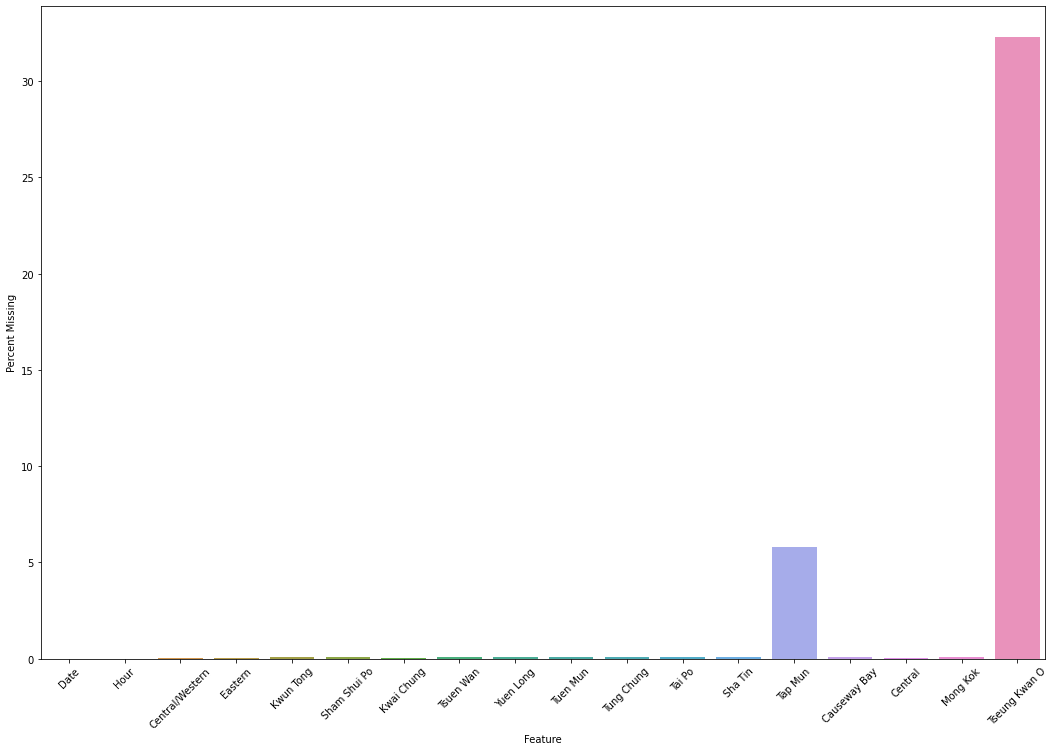

In [18]:
null_vals = df_complete.isnull().sum()/len(df_complete)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ['Feature','Percent Missing']
plt.figure(figsize=(18,12))
plt.xticks(rotation=45)
sns.barplot(x='Feature',y='Percent Missing',data=null_vals)

In [19]:
# Number missing in each column
df_complete.isnull().sum()

Date                   0
Hour                   0
Central/Western       19
Eastern               20
Kwun Tong             41
Sham Shui Po          38
Kwai Chung            31
Tsuen Wan             40
Yuen Long             65
Tuen Mun              54
Tung Chung            49
Tai Po                55
Sha Tin               45
Tap Mun             3629
Causeway Bay          51
Central               25
Mong Kok              37
Tseung Kwan O      20139
dtype: int64

### Drop Tap Mun and Tseung Kwan O, then re-examine % null

In [20]:
# Remove Tap Mun and Tseung Kwan O columns
# Tap Mun does not have a nearest station in the data
# Tseung Kwan O ~34% of data missing
to_drop = ['Tap Mun', 'Tseung Kwan O']
df_subset = df_complete.drop(to_drop, axis=1)
df_subset.head(3)

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
0,2014-01-01,01,6.0,7.0,9.0,8.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,10.0,7.0,9.0
1,2014-01-01,02,6.0,7.0,9.0,7.0,6.0,5.0,6.0,8.0,5.0,5.0,6.0,10.0,7.0,9.0
2,2014-01-01,03,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,5.0,5.0,6.0,9.0,6.0,8.0


<AxesSubplot:xlabel='Feature', ylabel='Percent Missing'>

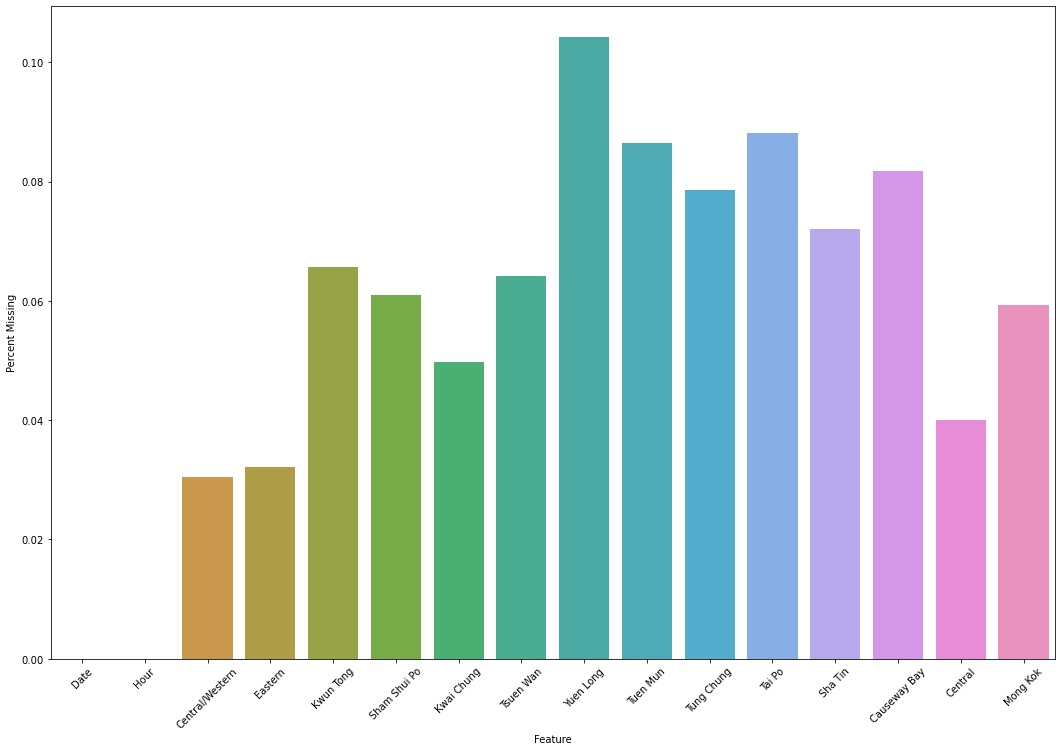

In [21]:
# Percent missing per column in df_subset
null_vals = df_subset.isnull().sum()/len(df_subset)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ['Feature','Percent Missing']
plt.figure(figsize=(18,12))
plt.xticks(rotation=45)
sns.barplot(x='Feature',y='Percent Missing',data=null_vals)

In [22]:
# Count consecutive Null values and get max
locations = ['Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung', 'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin', 'Causeway Bay', 'Central', 'Mong Kok']
null_counts = []

for i in locations:
    null = df_subset[i].isnull().astype(int).groupby(df_subset[i].notnull().astype(int).cumsum()).cumsum()
    null_counts.append(null.max())

print('Max consecutive nulls per column: ', null_counts)
print('Overall max consecutive nulls: ', max(null_counts))

Max consecutive nulls per column:  [3, 3, 14, 10, 4, 3, 7, 7, 7, 12, 12, 11, 4, 5]
Overall max consecutive nulls:  14


## Separate Hourly Data from Daily Max

### Create DataFrame with Daily Max Values

In [23]:
df_poll_max = df_subset[df_subset['Hour']=='Daily Max']
df_poll_max.reset_index(inplace=True, drop=True)
df_poll_max.shape

(2496, 16)

In [24]:
df_poll_max.isnull().sum()

Date               0
Hour               0
Central/Western    0
Eastern            0
Kwun Tong          0
Sham Shui Po       0
Kwai Chung         0
Tsuen Wan          0
Yuen Long          0
Tuen Mun           0
Tung Chung         0
Tai Po             0
Sha Tin            0
Causeway Bay       0
Central            0
Mong Kok           0
dtype: int64

### Create DataFrame with Hourly Values

In [25]:
df_poll_hourly = df_subset[df_subset['Hour']!='Daily Max']
df_poll_hourly.reset_index(inplace=True, drop=True)
df_poll_hourly.shape

(59904, 16)

In [26]:
# Convert hour to integer
df_poll_hourly.Hour = pd.to_numeric(df_poll_hourly.Hour)

/Users/tiffanyflor/opt/anaconda3/envs/hkpollution3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
df_poll_hourly.dtypes

Date               datetime64[ns]
Hour                        int64
Central/Western           float64
Eastern                   float64
Kwun Tong                 float64
Sham Shui Po              float64
Kwai Chung                float64
Tsuen Wan                 float64
Yuen Long                 float64
Tuen Mun                  float64
Tung Chung                float64
Tai Po                    float64
Sha Tin                   float64
Causeway Bay              float64
Central                   float64
Mong Kok                  float64
dtype: object

In [28]:
df_poll_hourly.isnull().sum()

Date                0
Hour                0
Central/Western    19
Eastern            20
Kwun Tong          41
Sham Shui Po       38
Kwai Chung         31
Tsuen Wan          40
Yuen Long          65
Tuen Mun           54
Tung Chung         49
Tai Po             55
Sha Tin            45
Causeway Bay       51
Central            25
Mong Kok           37
dtype: int64

## Handle missing and NA values in hourly df -- closest station
Fill NA values with closest station values. Closest stations are declared by HK gov website.

In [29]:
# Fill each district using value of district closest
# locations declared above includes each district / column

loc_dict = {'Central/Western': ['Central','Causeway Bay'],
            'Eastern': ['Kwun Tong', 'Causeway Bay'],
            'Sham Shui Po': ['Mong Kok','Kwai Chung'],
            'Kwai Chung': ['Tsuen Wan','Sham Shui Po'],
            'Tsuen Wan': ['Kwai Chung','Sham Shui Po'],
            'Yuen Long': ['Tuen Mun','Tsuen Wan'],
            'Tuen Mun': ['Yuen Long','Tung Chung'],
            'Tung Chung': ['Tuen Mun','Yuen Long'],
            'Tai Po': ['Sha Tin','Tsuen Wan'],
            'Sha Tin': ['Sham Shui Po','Kwai Chung'],
            'Causeway Bay': ['Central','Eastern'],
            'Central': ['Causeway Bay', 'Central/Western'],
            'Mong Kok': ['Sham Shui Po','Central'],
            'Kwun Tong': ['Eastern']
           }


for x in loc_dict:
    df_poll_hourly[x].fillna(df_poll_hourly[loc_dict[x][0]] if df_poll_hourly[loc_dict[x][0]].notnull else df_poll_hourly[loc_dict[x][1]] if loc_dict[x][1].notnull else np.nan, inplace=True)


/Users/tiffanyflor/opt/anaconda3/envs/hkpollution3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
df_subset.isnull().sum()

Date                0
Hour                0
Central/Western    19
Eastern            20
Kwun Tong          41
Sham Shui Po       38
Kwai Chung         31
Tsuen Wan          40
Yuen Long          65
Tuen Mun           54
Tung Chung         49
Tai Po             55
Sha Tin            45
Causeway Bay       51
Central            25
Mong Kok           37
dtype: int64

## Handle Remaining Missing Data

### Examine Hourly Pollution DataFrame

In [31]:
# Count consecutive Null values and get max
locations = ['Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung', 'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin', 'Causeway Bay', 'Central', 'Mong Kok']
null_counts = []

for i in locations:
    null = df_poll_hourly[i].isnull().astype(int).groupby(df_poll_hourly[i].notnull().astype(int).cumsum()).cumsum()
    null_counts.append(null.max())

print('Max consecutive nulls per column: ', null_counts)
print('Overall max consecutive nulls: ', max(null_counts))


Max consecutive nulls per column:  [5, 5, 5, 5, 5, 5, 7, 7, 7, 12, 5, 5, 5, 5]
Overall max consecutive nulls:  12


### Complete Fill of Null Values -- Hourly Pollution
Forward/Back Fill Hourly Pollution DataFrame

In [32]:
df_poll_hourly_filled = df_poll_hourly.bfill(axis=0,limit=math.ceil(max(null_counts)/2)).ffill(axis=0)

In [33]:
print('There are {} null values in the hourly pollution dataframe'.format(df_poll_hourly_filled.isnull().sum().sum()))

There are 0 null values in the hourly pollution dataframe


In [34]:
df_poll_hourly_filled.dtypes

Date               datetime64[ns]
Hour                        int64
Central/Western           float64
Eastern                   float64
Kwun Tong                 float64
Sham Shui Po              float64
Kwai Chung                float64
Tsuen Wan                 float64
Yuen Long                 float64
Tuen Mun                  float64
Tung Chung                float64
Tai Po                    float64
Sha Tin                   float64
Causeway Bay              float64
Central                   float64
Mong Kok                  float64
dtype: object

In [35]:
df_poll_hourly_filled.head(3)

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
0,2014-01-01,1,6.0,7.0,9.0,8.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,10.0,7.0,9.0
1,2014-01-01,2,6.0,7.0,9.0,7.0,6.0,5.0,6.0,8.0,5.0,5.0,6.0,10.0,7.0,9.0
2,2014-01-01,3,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,5.0,5.0,6.0,9.0,6.0,8.0


In [36]:
df_poll_hourly_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,59904.0,12.500000,6.922244,1.0,6.75,12.5,18.25,24.0
Central/Western,59904.0,3.435146,1.366426,1.0,2.00,3.0,4.00,11.0
Eastern,59904.0,3.509065,1.302623,1.0,3.00,3.0,4.00,11.0
Kwun Tong,59904.0,3.635350,1.315119,1.0,3.00,3.0,4.00,11.0
Sham Shui Po,59904.0,3.507595,1.329850,1.0,2.00,3.0,4.00,11.0
Kwai Chung,59904.0,3.555038,1.319542,1.0,3.00,3.0,4.00,11.0
Tsuen Wan,59904.0,3.385734,1.362411,1.0,2.00,3.0,4.00,11.0
Yuen Long,59904.0,3.352597,1.475543,1.0,2.00,3.0,4.00,11.0
Tuen Mun,59904.0,3.517595,1.509583,1.0,2.00,3.0,4.00,11.0
Tung Chung,59904.0,3.245226,1.459899,1.0,2.00,3.0,4.00,11.0


## Set Date to index to allow for resampling for min, max, and avg

In [37]:
# Set date to index
df_dates = df_poll_hourly_filled.set_index(df_poll_hourly_filled['Date'])
df_dates = df_dates.drop('Date', axis=1)
df_dates.index = pd.to_datetime(df_dates.index)
df_dates.head()

,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,,
2014-01-01,1,6.0,7.0,9.0,8.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,10.0,7.0,9.0
2014-01-01,2,6.0,7.0,9.0,7.0,6.0,5.0,6.0,8.0,5.0,5.0,6.0,10.0,7.0,9.0
2014-01-01,3,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,5.0,5.0,6.0,9.0,6.0,8.0
2014-01-01,4,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,4.0,5.0,6.0,9.0,5.0,8.0
2014-01-01,5,5.0,5.0,7.0,6.0,5.0,5.0,7.0,7.0,5.0,5.0,5.0,8.0,5.0,7.0


In [38]:
df_dates.index

DatetimeIndex(['2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01',
               ...
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=59904, freq=None)

In [39]:
df_dates.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,59904.0,12.500000,6.922244,1.0,6.75,12.5,18.25,24.0
Central/Western,59904.0,3.435146,1.366426,1.0,2.00,3.0,4.00,11.0
Eastern,59904.0,3.509065,1.302623,1.0,3.00,3.0,4.00,11.0
Kwun Tong,59904.0,3.635350,1.315119,1.0,3.00,3.0,4.00,11.0
Sham Shui Po,59904.0,3.507595,1.329850,1.0,2.00,3.0,4.00,11.0
Kwai Chung,59904.0,3.555038,1.319542,1.0,3.00,3.0,4.00,11.0
Tsuen Wan,59904.0,3.385734,1.362411,1.0,2.00,3.0,4.00,11.0
Yuen Long,59904.0,3.352597,1.475543,1.0,2.00,3.0,4.00,11.0
Tuen Mun,59904.0,3.517595,1.509583,1.0,2.00,3.0,4.00,11.0
Tung Chung,59904.0,3.245226,1.459899,1.0,2.00,3.0,4.00,11.0


In [40]:
df_dates = df_dates.apply(pd.to_numeric)
df_dates = df_dates.drop('Hour',axis=1)

## Daily Average Pollution DataFrame

In [41]:
daily_2014_2020 = df_dates.resample('D').mean()
daily_2014_2020.head()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,
2014-01-01,6.208333,5.916667,6.833333,6.708333,5.791667,5.708333,6.291667,6.625000,5.583333,4.916667,5.750000,8.041667,6.416667,7.458333
2014-01-02,5.541667,5.166667,5.583333,5.958333,5.583333,5.541667,5.583333,6.375000,5.416667,4.708333,5.000000,6.791667,6.083333,6.333333
2014-01-03,6.375000,6.416667,7.291667,7.208333,7.333333,7.000000,6.875000,7.291667,6.500000,6.375000,6.416667,8.625000,8.083333,7.625000
2014-01-04,7.250000,6.416667,7.458333,7.125000,7.250000,7.125000,7.458333,7.791667,7.125000,6.208333,7.041667,8.625000,8.166667,7.458333
2014-01-05,7.041667,6.333333,7.208333,7.208333,7.041667,7.250000,7.041667,7.083333,7.041667,5.708333,6.791667,7.666667,7.458333,7.541667


## Monthly Average Pollution DataFrame
Using the daily averages, calculate the monthly averages. This is similar to the calculation process of monthly temperature averages.

In [42]:
monthly_2014_2020 = daily_2014_2020.resample('M').mean()
monthly_2014_2020.head()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,
2014-01-31,5.151882,4.657258,5.404570,5.276882,5.181452,5.119624,5.233871,5.362903,5.282258,4.696237,4.931452,6.310484,6.110215,5.631720
2014-02-28,3.494048,3.244048,3.587798,3.590774,3.511905,3.474702,3.403274,3.407738,3.558036,3.437500,3.312500,4.379464,4.346726,4.049107
2014-03-31,3.923387,3.600806,3.934140,3.994624,3.897849,3.901882,3.767473,3.719086,3.744624,3.721774,3.716398,5.024194,4.790323,4.494624
2014-04-30,4.101389,3.925000,4.186111,4.354167,4.166667,4.075000,3.943056,3.919444,3.751389,3.820833,3.912500,4.962500,4.919444,4.898611
2014-05-31,2.700269,2.834677,3.119624,3.038978,3.068548,2.803763,2.782258,2.646505,2.631720,2.775538,2.837366,3.750000,3.473118,3.483871


## Average Monthly Minimums

In [43]:
mean_monthly_min_2014_2020 = df_dates.resample('D').min().resample('M').mean()
mean_monthly_min_2014_2020.head()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,
2014-01-31,4.225806,3.677419,4.419355,4.322581,4.193548,3.935484,4.000000,4.290323,3.967742,3.580645,3.838710,4.516129,4.516129,4.193548
2014-02-28,2.857143,2.607143,3.000000,3.000000,2.892857,2.785714,2.714286,2.678571,2.785714,2.857143,2.678571,2.964286,3.321429,3.071429
2014-03-31,3.193548,2.935484,3.193548,3.193548,3.064516,3.096774,3.064516,3.000000,3.032258,3.129032,3.064516,3.612903,3.677419,3.290323
2014-04-30,3.433333,3.200000,3.366667,3.600000,3.233333,3.266667,3.166667,3.133333,2.966667,3.100000,3.200000,3.633333,3.933333,3.600000
2014-05-31,2.387097,2.451613,2.483871,2.548387,2.451613,2.419355,2.322581,2.258065,2.290323,2.387097,2.548387,2.516129,2.580645,2.548387


## Average Monthly Maximums

In [44]:
mean_monthly_max_2014_2020 = df_dates.resample('D').max().resample('M').mean()
mean_monthly_max_2014_2020.head()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,
2014-01-31,6.387097,5.741935,6.677419,6.548387,6.419355,6.516129,6.580645,6.677419,7.032258,5.806452,6.225806,8.064516,7.806452,7.258065
2014-02-28,4.178571,3.857143,4.142857,4.357143,4.250000,4.321429,4.285714,4.321429,4.428571,4.071429,4.000000,5.678571,5.750000,5.035714
2014-03-31,4.870968,4.354839,4.741935,4.967742,4.967742,4.935484,4.580645,4.709677,4.645161,4.580645,4.483871,6.709677,6.064516,5.677419
2014-04-30,4.966667,4.800000,5.000000,5.200000,5.033333,4.900000,4.966667,4.800000,4.666667,4.533333,4.833333,6.166667,6.133333,6.200000
2014-05-31,3.322581,3.387097,3.806452,3.774194,3.741935,3.387097,3.451613,3.225806,3.064516,3.419355,3.419355,5.258065,4.516129,4.387097


## Peek into visualizing the data

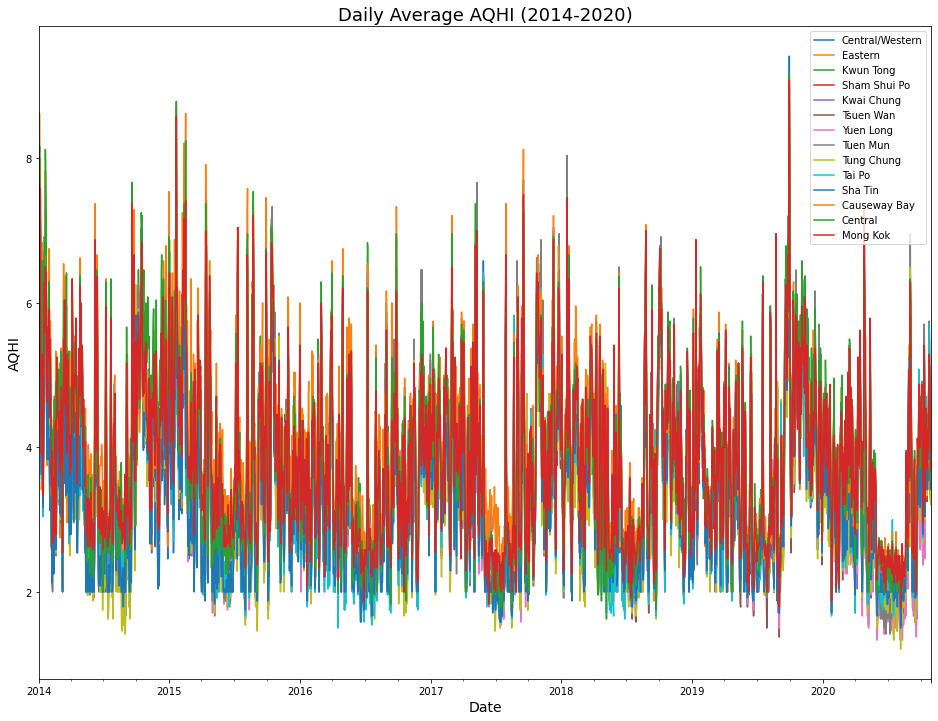

In [45]:
# Plot daily average AQHI for each station
fig = daily_2014_2020.plot(figsize=(16,12)).get_figure()
plt.title('Daily Average AQHI (2014-2020)',size=18)
plt.xlabel('Date',size=14)
plt.ylabel('AQHI',size=14)
plt.show()

fig.savefig(parent_path + '/visualizations/daily_aqhi_all_stations_timeseries.jpg')

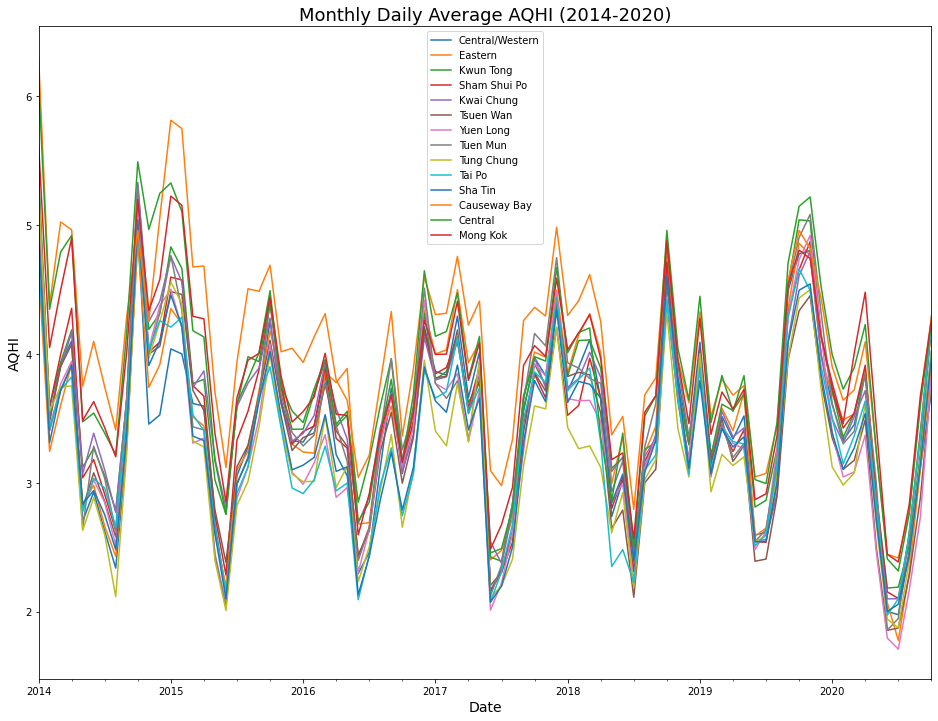

In [46]:
# Plot monthly average AQHI for each station
fig = monthly_2014_2020.plot(figsize=(16,12)).get_figure()
plt.title('Monthly Daily Average AQHI (2014-2020)',size=18)
plt.xlabel('Date',size=14)
plt.ylabel('AQHI',size=14)
plt.show()

fig.savefig(parent_path + '/visualizations/monthly_avg_aqhi_all_stations_timeseries.jpg')

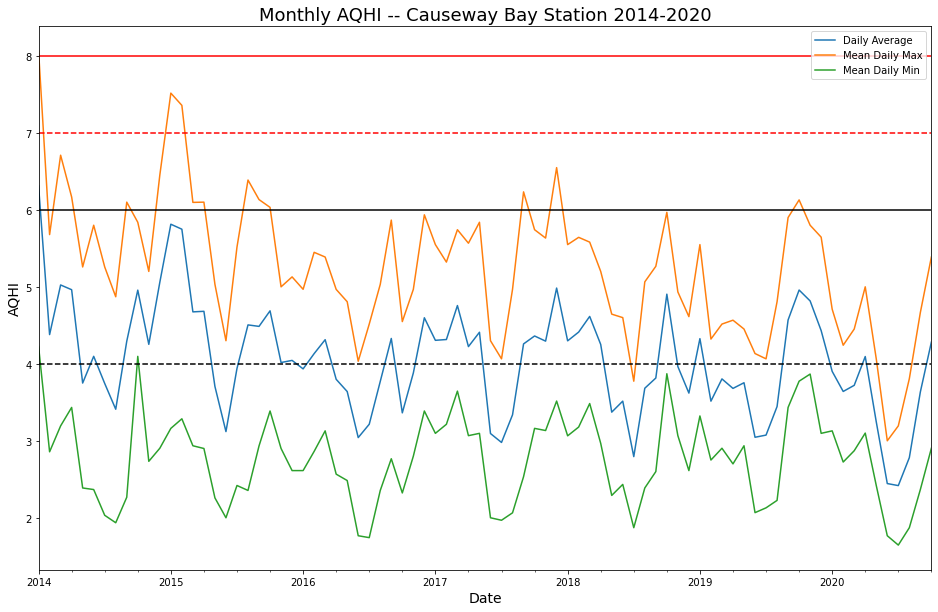

In [47]:
# Create visual for Causeway Bay min, max, avg AQHI

central_western = pd.concat([monthly_2014_2020[['Causeway Bay']], mean_monthly_max_2014_2020[['Causeway Bay']], mean_monthly_min_2014_2020[['Central/Western']]], axis=1) 
central_western.columns = ['Daily Average','Mean Daily Max','Mean Daily Min']

fig = central_western.plot(figsize=(16,10)).get_figure()
plt.axhline(y=4,color='black',linestyle='--')
plt.axhline(y=6,color='black')
plt.axhline(y=7,color='red',linestyle='--')
plt.axhline(y=8,color='red')


# Set title and labels for axes
plt.xlabel('Date',size=14)
plt.ylabel('AQHI',size=14)
plt.title('Monthly AQHI -- Causeway Bay Station 2014-2020',size=18)

plt.show()

fig.savefig(parent_path + '/visualizations/monthly_aqhi_causeway_bay_min_max_avg.jpg')

## Export data to new csv files
Max Pollution, Hourly Pollution, and Monthly Average Pollution

In [48]:
df_poll_max.to_csv(parent_path + '/data/interim/daily_max_pollution.csv')
mean_monthly_max_2014_2020.to_csv(parent_path + '/data/interim/pollution_monthly_max_2014_2020.csv')
mean_monthly_min_2014_2020.to_csv(parent_path + '/data/interim/pollution_monthly_min_2014_2020.csv')
df_poll_hourly.to_csv(parent_path + '/data/interim/hourly_pollution.csv')
monthly_2014_2020.to_csv(parent_path + '/data/interim/monthly_pollution_2014_2020.csv')